In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/processed/sales_data_processed.csv')

In [ ]:
df.groupby('Date')['Sales'].sum().plot(figsize=(15, 5))
plt.title('Total Sales Over Time')
plt.ylabel('Sales')
plt.show()

In [ ]:
store_types = [col for col in df.columns if 'StoreType_' in col]
df.groupby(store_types)['Sales'].mean().plot(kind='bar')
plt.title('Average Sales by Store Type')
plt.ylabel('Sales')
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv('../data/processed/sales_data_processed.csv')
print(df.head())

In [ ]:
print(df.dtypes)


In [ ]:
print(df.isnull().sum())


In [ ]:
print(df.describe())


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Sales'].plot(figsize=(15, 5))
plt.title('Sales Over Time')
plt.ylabel('Sales')
plt.show()


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Sales'], model='additive', period=365)
result.plot()
plt.show()


In [ ]:
sns.boxplot(x='DayOfWeek', y='Sales', data=df.reset_index())
plt.title('Sales by Day of Week')
plt.show()


In [ ]:
sns.boxplot(x='StoreType', y='Sales', data=df.reset_index())
plt.title('Sales by Store Type')
plt.show()


In [ ]:
sns.boxplot(x='StateHoliday', y='Sales', data=df.reset_index())
plt.title('Sales on State Holidays')
plt.show()


In [ ]:
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
sns.scatterplot(x='Customers', y='Sales', data=df.reset_index())
plt.title('Sales vs. Customers')
plt.show()


In [ ]:
sns.scatterplot(x='CompetitionDistance', y='Sales', data=df.reset_index())
plt.title('Sales vs. Competition Distance')
plt.show()


In [ ]:
pd.plotting.autocorrelation_plot(df['Sales'])
plt.title('Autocorrelation of Sales')
plt.show()


In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Sales'], lags=30)
plt.title('Partial Autocorrelation of Sales')
plt.show()


In [ ]:
for lag in range(1, 8):
    df[f'Lag_{lag}'] = df['Sales'].shift(lag)
df.dropna(inplace=True)
lag_corr = df[[f'Lag_{lag}' for lag in range(1, 8)] + ['Sales']].corr()
print(lag_corr['Sales'])


In [ ]:
sns.boxplot(y='Sales', data=df.reset_index())
plt.title('Boxplot of Sales')
plt.show()


In [2]:
# Import necessary libraries
import pandas as pd

# Load the processed data
df = pd.read_csv('../data/processed/sales_data_processed.csv')

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by 'Store' and 'Date' to maintain chronological order
df.sort_values(by=['Store', 'Date'], inplace=True)

# Create lag features for the previous 1, 2, and 3 days
df['Sales_Lag_1'] = df.groupby('Store')['Sales'].shift(1)
df['Sales_Lag_2'] = df.groupby('Store')['Sales'].shift(2)
df['Sales_Lag_3'] = df.groupby('Store')['Sales'].shift(3)

# Drop rows with missing values created by shifting
df.dropna(inplace=True)

# Save the new dataframe with lag features
df.to_csv('../data/processed/sales_data_with_lags.csv', index=False)

# Display the first few rows to verify
df.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,...,StoreType_d,Assortment_b,Assortment_c,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,Sales_Lag_1,Sales_Lag_2,Sales_Lag_3
839886,1,5,2013-01-05,4997,635,1,0,1,1270.0,9.0,...,False,False,False,True,False,False,False,4486.0,4327.0,5530.0
838761,1,0,2013-01-07,7176,785,1,1,1,1270.0,9.0,...,False,False,False,True,False,False,False,4997.0,4486.0,4327.0
837656,1,1,2013-01-08,5580,654,1,1,1,1270.0,9.0,...,False,False,False,True,False,False,False,7176.0,4997.0,4486.0
836551,1,2,2013-01-09,5471,626,1,1,1,1270.0,9.0,...,False,False,False,True,False,False,False,5580.0,7176.0,4997.0
835446,1,3,2013-01-10,4892,615,1,1,1,1270.0,9.0,...,False,False,False,True,False,False,False,5471.0,5580.0,7176.0


In [3]:
# Select the features for modeling
features = [
    'Store', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'CompetitionDistance',
    'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
    'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day',
    'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c',
    'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
    'Sales_Lag_1', 'Sales_Lag_2', 'Sales_Lag_3'
]

# Define the target variable
target = 'Sales'

# Create the feature matrix X and target vector y
X = df[features]
y = df[target]


In [4]:
from sklearn.model_selection import train_test_split

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
import joblib

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, '../src/models/random_forest_model.pkl')


['../src/models/random_forest_model.pkl']

In [15]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

# Print the results
print('Mean Absolute Error (MAE):', mae)
print('Root Mean Squared Error (RMSE):', rmse)


Mean Absolute Error (MAE): 795.1872551560948
Root Mean Squared Error (RMSE): 1179.3752098443258


In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Save the best model
joblib.dump(best_model, '../src/models/best_random_forest_model.pkl')

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = root_mean_squared_error(y_test, y_pred_best)

print('Best Model MAE:', mae_best)
print('Best Model RMSE:', rmse_best)


KeyboardInterrupt: 

In [20]:
# Get feature importances from the model
importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Display the feature importances
print(feature_importance_df)

                      Feature  Importance
21                Sales_Lag_1    0.561619
22                Sales_Lag_2    0.107008
1                   DayOfWeek    0.077011
2                       Promo    0.069010
23                Sales_Lag_3    0.044708
12                        Day    0.027238
4         CompetitionDistance    0.024247
11                      Month    0.019135
0                       Store    0.017959
6    CompetitionOpenSinceYear    0.008629
5   CompetitionOpenSinceMonth    0.007374
8             Promo2SinceWeek    0.006974
15                StoreType_d    0.005015
9             Promo2SinceYear    0.004896
10                       Year    0.004160
14                StoreType_c    0.003942
3               SchoolHoliday    0.003236
17               Assortment_c    0.002980
13                StoreType_b    0.002409
18             StateHoliday_a    0.000789
7                      Promo2    0.000756
16               Assortment_b    0.000597
19             StateHoliday_b    0

In [21]:
# Ensure data is sorted by 'Store' and 'Date'
df.sort_values(by=['Store', 'Date'], inplace=True)

# Create rolling mean features for a 7-day window
df['Rolling_Mean_7'] = df.groupby('Store')['Sales'].transform(lambda x: x.shift(1).rolling(window=7).mean())

# Create rolling mean features for a 14-day window
df['Rolling_Mean_14'] = df.groupby('Store')['Sales'].transform(lambda x: x.shift(1).rolling(window=14).mean())

# Drop rows with missing values
df.dropna(inplace=True)

# Update the features list
features.extend(['Rolling_Mean_7', 'Rolling_Mean_14'])

# Update X and y
X = df[features]
y = df[target]


In [22]:
import numpy as np

# Add sine and cosine transformations to capture seasonality
df['DayOfYear'] = df['Date'].dt.dayofyear
df['Sin_DayOfYear'] = np.sin(2 * np.pi * df['DayOfYear'] / 365.25)
df['Cos_DayOfYear'] = np.cos(2 * np.pi * df['DayOfYear'] / 365.25)

# Update the features list
features.extend(['Sin_DayOfYear', 'Cos_DayOfYear'])

# Update X and y
X = df[features]
y = df[target]


In [23]:
# Interaction between Promo and SchoolHoliday
df['Promo_SchoolHoliday'] = df['Promo'] * df['SchoolHoliday']

# Update the features list
features.append('Promo_SchoolHoliday')

# Update X and y
X = df[features]
y = df[target]


In [24]:
import lightgbm as lgb

# Prepare the dataset for LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Define parameters
params = {
    'objective': 'regression',
    'metric': 'mae',
    'verbosity': -1,
    'seed': 42
}

# Train the model
lgbm_model = lgb.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[train_data, test_data],
    early_stopping_rounds=50
)

# Save the model
lgbm_model.save_model('models/lightgbm_model.txt')

# Make predictions
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate the model
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
rmse_lgbm = root_mean_squared_error(y_test, y_pred_lgbm)

print('LightGBM MAE:', mae_lgbm)
print('LightGBM RMSE:', rmse_lgbm)


TypeError: train() got an unexpected keyword argument 'early_stopping_rounds'

In [25]:
from prophet import Prophet

# Prepare the data
prophet_df = df[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})

# Initialize the model
prophet_model = Prophet()

# Fit the model
prophet_model.fit(prophet_df)

# Make future dataframe
future = prophet_model.make_future_dataframe(periods=90)  # Predict 90 days into the future

# Predict
forecast = prophet_model.predict(future)

# Evaluate the model on the test set
test_df = prophet_df[prophet_df['ds'].isin(X_test['Date'])]
y_pred_prophet = forecast[forecast['ds'].isin(X_test['Date'])]['yhat']
y_test_prophet = test_df['y']

# Calculate metrics
mae_prophet = mean_absolute_error(y_test_prophet, y_pred_prophet)
rmse_prophet = root_mean_squared_error(y_test_prophet, y_pred_prophet)

print('Prophet MAE:', mae_prophet)
print('Prophet RMSE:', rmse_prophet)


d:\GitHub\retailiq\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


KeyboardInterrupt: 

In [27]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

# Define the parameter grid
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 500, 1000],
    'max_depth': [ -1, 10, 20],
    'min_child_samples': [20, 30, 50]
}

# Initialize the model
lgbm_regressor = lgb.LGBMRegressor(objective='regression', random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgbm_regressor,
    param_distributions=param_grid,
    n_iter=20,
    scoring='neg_mean_absolute_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Perform the search
random_search.fit(X_train, y_train)

# Best model
best_lgbm_model = random_search.best_estimator_

# Save the best model
best_lgbm_model.booster_.save_model('models/best_lightgbm_model.txt')

# Evaluate the best model
y_pred_best_lgbm = best_lgbm_model.predict(X_test)
mae_best_lgbm = mean_absolute_error(y_test, y_pred_best_lgbm)
rmse_best_lgbm = root_mean_squared_error(y_test, y_pred_best_lgbm)

print('Best LightGBM MAE:', mae_best_lgbm)
print('Best LightGBM RMSE:', rmse_best_lgbm)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


KeyboardInterrupt: 

In [28]:
# Add a 7-day lag to capture weekly seasonality
df['Sales_Lag_7'] = df.groupby('Store')['Sales'].shift(7)

# Add a 14-day lag to capture bi-weekly patterns
df['Sales_Lag_14'] = df.groupby('Store')['Sales'].shift(14)

# Update the features list
features.extend(['Sales_Lag_7', 'Sales_Lag_14'])

# Drop rows with missing values due to new lag features
df.dropna(inplace=True)

# Update X and y
X = df[features]
y = df[target]


In [29]:
# Add a 3-day rolling mean
df['Rolling_Mean_3'] = df.groupby('Store')['Sales'].transform(
    lambda x: x.shift(1).rolling(window=3).mean()
)

# Update the features list
features.append('Rolling_Mean_3')

# Drop rows with missing values
df.dropna(inplace=True)

# Update X and y
X = df[features]
y = df[target]


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print('Updated MAE:', mae)
print('Updated RMSE:', rmse)


Updated MAE: 648.0547438711358
Updated RMSE: 961.7145130523978


In [31]:
# Select the first 100 stores
sample_stores = df['Store'].unique()[:100]

# Filter the dataframe
df_sample = df[df['Store'].isin(sample_stores)]

# Proceed with df_sample instead of df
X = df_sample[features]
y = df_sample[target]


In [32]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                      Feature  Importance
25            Rolling_Mean_14    0.522605
21                Sales_Lag_1    0.158411
2                       Promo    0.113385
1                   DayOfWeek    0.056310
27              Cos_DayOfYear    0.020801
12                        Day    0.018809
31             Rolling_Mean_3    0.011992
24             Rolling_Mean_7    0.011691
29                Sales_Lag_7    0.009617
4         CompetitionDistance    0.009563
30               Sales_Lag_14    0.008993
22                Sales_Lag_2    0.007460
0                       Store    0.007336
26              Sin_DayOfYear    0.007137
23                Sales_Lag_3    0.006852
11                      Month    0.004406
6    CompetitionOpenSinceYear    0.004074
5   CompetitionOpenSinceMonth    0.003419
8             Promo2SinceWeek    0.003147
15                StoreType_d    0.003011
14                StoreType_c    0.002361
9             Promo2SinceYear    0.002338
17               Assortment_c    0

In [33]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

tscv = TimeSeriesSplit(n_splits=5)
scores = cross_val_score(
    model, X, y, cv=tscv, scoring='neg_mean_absolute_error', n_jobs=-1
)
mean_mae = -scores.mean()
print('Cross-Validated MAE:', mean_mae)


Cross-Validated MAE: 796.0114150112211


In [34]:
# Add lag features up to 30 days
for lag in range(1, 31):
    df[f'Sales_Lag_{lag}'] = df.groupby('Store')['Sales'].shift(lag)

# Drop rows with missing values
df.dropna(inplace=True)

# Update the features list
lag_features = [f'Sales_Lag_{lag}' for lag in range(1, 31)]
features.extend(lag_features)

# Update X and y
X = df[features]
y = df[target]


In [35]:
# Rolling windows of 7, 14, 30 days
window_sizes = [7, 14, 30]
for window in window_sizes:
    df[f'Rolling_Mean_{window}'] = df.groupby('Store')['Sales'].transform(
        lambda x: x.shift(1).rolling(window=window).mean()
    )
    df[f'Rolling_Std_{window}'] = df.groupby('Store')['Sales'].transform(
        lambda x: x.shift(1).rolling(window=window).std()
    )

# Drop rows with missing values
df.dropna(inplace=True)

# Update the features list
for window in window_sizes:
    features.extend([f'Rolling_Mean_{window}', f'Rolling_Std_{window}'])

# Update X and y
X = df[features]
y = df[target]


In [36]:
# Add EWMA feature
df['EWMA_12'] = df.groupby('Store')['Sales'].transform(
    lambda x: x.shift(1).ewm(span=12, adjust=False).mean()
)

# Update the features list
features.append('EWMA_12')

# Drop rows with missing values
df.dropna(inplace=True)

# Update X and y
X = df[features]
y = df[target]


In [37]:
# Cumulative sales per store
df['Cumulative_Sales'] = df.groupby('Store')['Sales'].cumsum()

# Update the features list
features.append('Cumulative_Sales')

# Update X and y
X = df[features]
y = df[target]


In [56]:
import lightgbm as lgb
from lightgbm import early_stopping

# Split the data (if not already split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Create LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters
params = {
    'objective': 'regression',
    'metric': 'mae',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1,
    'random_state': 42
}

# Define early stopping
callbacks = [early_stopping(stopping_rounds=50)]

# Train the model
lgbm_model = lgb.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[train_data, test_data],
    callbacks=callbacks
)

# Make predictions
y_pred_lgbm = lgbm_model.predict(X_test, num_iteration=lgbm_model.best_iteration)

# Evaluate the model
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
rmse_lgbm = root_mean_squared_error(y_test, y_pred_lgbm)

print('LightGBM MAE:', mae_lgbm)
print('LightGBM RMSE:', rmse_lgbm)


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's l1: 499.882	valid_1's l1: 532.42
LightGBM MAE: 532.4202688559542
LightGBM RMSE: 776.6612915362568


In [2]:
import pandas as pd

# Load the processed data
df = pd.read_csv('../data/processed/sales_data_processed.csv')

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the data by 'Store' and 'Date' to maintain chronological order
df.sort_values(by=['Store', 'Date'], inplace=True)

# Create lag features for previous days
df['Sales_Lag_1'] = df.groupby('Store')['Sales'].shift(1)
df['Sales_Lag_2'] = df.groupby('Store')['Sales'].shift(2)
df['Sales_Lag_3'] = df.groupby('Store')['Sales'].shift(3)
df['Sales_Lag_7'] = df.groupby('Store')['Sales'].shift(7)
df['Sales_Lag_14'] = df.groupby('Store')['Sales'].shift(14)

# Rolling mean features
df['Rolling_Mean_3'] = df.groupby('Store')['Sales'].shift(1).rolling(window=3).mean()
df['Rolling_Mean_7'] = df.groupby('Store')['Sales'].shift(1).rolling(window=7).mean()
df['Rolling_Mean_14'] = df.groupby('Store')['Sales'].shift(1).rolling(window=14).mean()
df['Rolling_Mean_30'] = df.groupby('Store')['Sales'].shift(1).rolling(window=30).mean()

# Rolling standard deviation features
df['Rolling_Std_7'] = df.groupby('Store')['Sales'].shift(1).rolling(window=7).std()
df['Rolling_Std_14'] = df.groupby('Store')['Sales'].shift(1).rolling(window=14).std()
df['Rolling_Std_30'] = df.groupby('Store')['Sales'].shift(1).rolling(window=30).std()

# EWMA feature
df['EWMA_12'] = df.groupby('Store')['Sales'].shift(1).ewm(span=12, adjust=False).mean()

# Cumulative sales per store (excluding current day)
df['Cumulative_Sales'] = df.groupby('Store')['Sales'].cumsum() - df['Sales']



In [3]:
import numpy as np

df['DayOfYear'] = df['Date'].dt.dayofyear
df['Sin_DayOfYear'] = np.sin(2 * np.pi * df['DayOfYear'] / 365.25)
df['Cos_DayOfYear'] = np.cos(2 * np.pi * df['DayOfYear'] / 365.25)
df['Promo_SchoolHoliday'] = df['Promo'] * df['SchoolHoliday']

# Drop rows with any missing values
df.dropna(inplace=True)

# List of features
features = [
    'Store', 'DayOfWeek', 'Promo', 'SchoolHoliday', 'CompetitionDistance',
    'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
    'Promo2SinceWeek', 'Promo2SinceYear', 'Year', 'Month', 'Day',
    'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c',
    'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
    'Sales_Lag_1', 'Sales_Lag_2', 'Sales_Lag_3', 'Sales_Lag_7', 'Sales_Lag_14',
    'Rolling_Mean_3', 'Rolling_Mean_7', 'Rolling_Mean_14', 'Rolling_Mean_30',
    'Rolling_Std_7', 'Rolling_Std_14', 'Rolling_Std_30',
    'EWMA_12', 'Cumulative_Sales',
    'Sin_DayOfYear', 'Cos_DayOfYear',
    'Promo_SchoolHoliday'
]

target = 'Sales'

# Create the feature matrix X and target vector y
X = df[features]
y = df[target]


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [5]:
from catboost import CatBoostRegressor
import numpy as np
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

# Identify categorical features by their indices
categorical_features_indices = np.where(X.dtypes == 'object')[0]

# Initialize CatBoostRegressor
cat_model = CatBoostRegressor(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    eval_metric='MAE',
    random_seed=42,
    early_stopping_rounds=50,
    verbose=False
)

# Train the model
cat_model.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    cat_features=categorical_features_indices,
    use_best_model=True
)

# Make predictions
y_pred_cat = cat_model.predict(X_test)

# Evaluate the model
mae_cat = mean_absolute_error(y_test, y_pred_cat)
rmse_cat = root_mean_squared_error(y_test, y_pred_cat)

print('CatBoost MAE:', mae_cat)
print('CatBoost RMSE:', rmse_cat)


CatBoost MAE: 607.5347114512367
CatBoost RMSE: 889.5534131662988


In [32]:
import optuna
import lightgbm as lgb
from lightgbm import early_stopping

def objective(trial):
    params = {
        'objective': 'regression',
        'metric': 'l1',
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 50),
        'max_depth': trial.suggest_int('max_depth', 5, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 50),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'random_state': 42
    }
    lgbm_train = lgb.Dataset(X_train, label=y_train)

    # Define the early stopping callback
    callbacks = [early_stopping(stopping_rounds=50)]

    cv_results = lgb.cv(
        params,
        lgbm_train,
        nfold=3,
        num_boost_round=1000,
        callbacks=callbacks,
        stratified=False,
        metrics='l1',
        seed=42
    )
    
    return min(cv_results['valid l1-mean'])

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print('Best trial:', study.best_trial.params)


[I 2024-11-29 01:48:17,930] A new study created in memory with name: no-name-ba2c0141-bb3e-40c4-b0d2-11e99a2cac37


Training until validation scores don't improve for 50 rounds


[I 2024-11-29 01:49:04,409] Trial 0 finished with value: 593.4181274363901 and parameters: {'learning_rate': 0.018599246745883997, 'num_leaves': 30, 'max_depth': 14, 'min_child_samples': 12, 'subsample': 0.7541877484762929, 'colsample_bytree': 0.7307921195337599}. Best is trial 0 with value: 593.4181274363901.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 593.418 + 0.499185
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 01:49:47,739] Trial 1 finished with value: 541.4982408364548 and parameters: {'learning_rate': 0.04167159735784706, 'num_leaves': 37, 'max_depth': 9, 'min_child_samples': 44, 'subsample': 0.8294739936242451, 'colsample_bytree': 0.928977790480308}. Best is trial 1 with value: 541.4982408364548.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 541.498 + 2.50167
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 01:50:40,231] Trial 2 finished with value: 581.4271015456635 and parameters: {'learning_rate': 0.01849598170578551, 'num_leaves': 36, 'max_depth': 13, 'min_child_samples': 42, 'subsample': 0.6211605915494188, 'colsample_bytree': 0.8611684846680504}. Best is trial 1 with value: 541.4982408364548.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 581.427 + 1.0889
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 01:51:27,935] Trial 3 finished with value: 552.9866221392695 and parameters: {'learning_rate': 0.06818668631919969, 'num_leaves': 29, 'max_depth': 5, 'min_child_samples': 43, 'subsample': 0.8414033426620864, 'colsample_bytree': 0.9158092005925678}. Best is trial 1 with value: 541.4982408364548.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 552.987 + 2.05763
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 01:52:18,339] Trial 4 finished with value: 592.5355471470366 and parameters: {'learning_rate': 0.02207942481268871, 'num_leaves': 26, 'max_depth': 15, 'min_child_samples': 29, 'subsample': 0.6265513979496818, 'colsample_bytree': 0.7329986588329822}. Best is trial 1 with value: 541.4982408364548.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 592.536 + 0.188949
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 01:53:12,015] Trial 5 finished with value: 512.798816533632 and parameters: {'learning_rate': 0.08549015951646641, 'num_leaves': 49, 'max_depth': 8, 'min_child_samples': 33, 'subsample': 0.5209550001086476, 'colsample_bytree': 0.7591597830162264}. Best is trial 5 with value: 512.798816533632.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 512.799 + 1.0276
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 01:53:56,682] Trial 6 finished with value: 585.1491486906656 and parameters: {'learning_rate': 0.035301042083681795, 'num_leaves': 21, 'max_depth': 9, 'min_child_samples': 25, 'subsample': 0.6489549299127476, 'colsample_bytree': 0.5272965232383687}. Best is trial 5 with value: 512.798816533632.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 585.149 + 0.672525
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 01:54:45,317] Trial 7 finished with value: 568.8102726842937 and parameters: {'learning_rate': 0.045388952795098976, 'num_leaves': 47, 'max_depth': 5, 'min_child_samples': 36, 'subsample': 0.7254485857598787, 'colsample_bytree': 0.9593533248391641}. Best is trial 5 with value: 512.798816533632.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 568.81 + 0.802404
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 01:55:41,218] Trial 8 finished with value: 528.1536273432741 and parameters: {'learning_rate': 0.06265641261871377, 'num_leaves': 49, 'max_depth': 7, 'min_child_samples': 33, 'subsample': 0.6114556900340732, 'colsample_bytree': 0.5430048316426632}. Best is trial 5 with value: 512.798816533632.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 528.154 + 0.605706
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 01:56:24,951] Trial 9 finished with value: 506.4371628044565 and parameters: {'learning_rate': 0.084373328724539, 'num_leaves': 47, 'max_depth': 10, 'min_child_samples': 23, 'subsample': 0.506633129971027, 'colsample_bytree': 0.9812122547605215}. Best is trial 9 with value: 506.4371628044565.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 506.437 + 1.30947
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 01:57:25,038] Trial 10 finished with value: 603.5913455371418 and parameters: {'learning_rate': 0.011301684992283704, 'num_leaves': 41, 'max_depth': 12, 'min_child_samples': 18, 'subsample': 0.9639847742071975, 'colsample_bytree': 0.8246142228177638}. Best is trial 9 with value: 506.4371628044565.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 603.591 + 0.892856
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 01:58:07,372] Trial 11 finished with value: 511.05048254252205 and parameters: {'learning_rate': 0.0896163491376238, 'num_leaves': 44, 'max_depth': 11, 'min_child_samples': 22, 'subsample': 0.5175467917413795, 'colsample_bytree': 0.6307888190993273}. Best is trial 9 with value: 506.4371628044565.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 511.05 + 0.763255
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 01:58:53,747] Trial 12 finished with value: 510.1675634859948 and parameters: {'learning_rate': 0.09438336839462678, 'num_leaves': 43, 'max_depth': 11, 'min_child_samples': 22, 'subsample': 0.5093934557625759, 'colsample_bytree': 0.641024511281768}. Best is trial 9 with value: 506.4371628044565.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 510.168 + 1.27192
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 01:59:31,938] Trial 13 finished with value: 508.91997196735184 and parameters: {'learning_rate': 0.099322247477606, 'num_leaves': 41, 'max_depth': 11, 'min_child_samples': 16, 'subsample': 0.5030463141175401, 'colsample_bytree': 0.6395014452713712}. Best is trial 9 with value: 506.4371628044565.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 508.92 + 0.253784
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 02:00:09,519] Trial 14 finished with value: 530.1036871680927 and parameters: {'learning_rate': 0.05622025734176521, 'num_leaves': 40, 'max_depth': 10, 'min_child_samples': 10, 'subsample': 0.5570816925064817, 'colsample_bytree': 0.6327713458767774}. Best is trial 9 with value: 506.4371628044565.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 530.104 + 1.48524
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 02:00:47,462] Trial 15 finished with value: 512.6629238200431 and parameters: {'learning_rate': 0.06863324796259407, 'num_leaves': 45, 'max_depth': 12, 'min_child_samples': 16, 'subsample': 0.6892662468068258, 'colsample_bytree': 0.8105607697949828}. Best is trial 9 with value: 506.4371628044565.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 512.663 + 0.412781
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 02:01:23,075] Trial 16 finished with value: 518.6169773832794 and parameters: {'learning_rate': 0.09845596223626184, 'num_leaves': 38, 'max_depth': 7, 'min_child_samples': 50, 'subsample': 0.5638726965420364, 'colsample_bytree': 0.6841501080335138}. Best is trial 9 with value: 506.4371628044565.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 518.617 + 1.02902
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 02:02:02,631] Trial 17 finished with value: 572.8352651132157 and parameters: {'learning_rate': 0.026158646470382813, 'num_leaves': 32, 'max_depth': 10, 'min_child_samples': 16, 'subsample': 0.5727471901991321, 'colsample_bytree': 0.9939547139082521}. Best is trial 9 with value: 506.4371628044565.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 572.835 + 1.56173
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 02:02:43,015] Trial 18 finished with value: 520.7452560829574 and parameters: {'learning_rate': 0.05448666419174488, 'num_leaves': 50, 'max_depth': 13, 'min_child_samples': 26, 'subsample': 0.9846071558724613, 'colsample_bytree': 0.5717029481347183}. Best is trial 9 with value: 506.4371628044565.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 520.745 + 0.890744
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 02:03:34,174] Trial 19 finished with value: 607.1248275553207 and parameters: {'learning_rate': 0.010574634316209273, 'num_leaves': 41, 'max_depth': 11, 'min_child_samples': 20, 'subsample': 0.8842331336534888, 'colsample_bytree': 0.8734365204086861}. Best is trial 9 with value: 506.4371628044565.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 607.125 + 0.478537
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 02:04:08,272] Trial 20 finished with value: 524.2946365720917 and parameters: {'learning_rate': 0.07635311772843287, 'num_leaves': 34, 'max_depth': 9, 'min_child_samples': 12, 'subsample': 0.6874476046649174, 'colsample_bytree': 0.6798202469694777}. Best is trial 9 with value: 506.4371628044565.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 524.295 + 0.309208
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 02:04:43,504] Trial 21 finished with value: 506.3878714756559 and parameters: {'learning_rate': 0.09610948906872563, 'num_leaves': 44, 'max_depth': 11, 'min_child_samples': 23, 'subsample': 0.5011600913579805, 'colsample_bytree': 0.6285306710776849}. Best is trial 21 with value: 506.3878714756559.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 506.388 + 0.22883
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 02:05:19,975] Trial 22 finished with value: 513.2856964178059 and parameters: {'learning_rate': 0.07599580924093921, 'num_leaves': 46, 'max_depth': 12, 'min_child_samples': 26, 'subsample': 0.5798335955994733, 'colsample_bytree': 0.603919420627487}. Best is trial 21 with value: 506.3878714756559.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 513.286 + 0.333638
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 02:05:55,374] Trial 23 finished with value: 534.7018879432634 and parameters: {'learning_rate': 0.048945571528003454, 'num_leaves': 43, 'max_depth': 10, 'min_child_samples': 17, 'subsample': 0.5001032177558556, 'colsample_bytree': 0.5007525125840266}. Best is trial 21 with value: 506.3878714756559.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 534.702 + 0.578675
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 02:06:30,165] Trial 24 finished with value: 514.548484380489 and parameters: {'learning_rate': 0.09965885899735571, 'num_leaves': 39, 'max_depth': 8, 'min_child_samples': 23, 'subsample': 0.5513457096206753, 'colsample_bytree': 0.6769264191592118}. Best is trial 21 with value: 506.3878714756559.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 514.548 + 1.19044
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 02:07:06,807] Trial 25 finished with value: 509.31720301281104 and parameters: {'learning_rate': 0.07610865804538225, 'num_leaves': 47, 'max_depth': 13, 'min_child_samples': 14, 'subsample': 0.5402193684217689, 'colsample_bytree': 0.7878768078909619}. Best is trial 21 with value: 506.3878714756559.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 509.317 + 1.46215
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 02:07:47,726] Trial 26 finished with value: 543.3713401463938 and parameters: {'learning_rate': 0.03776289942584105, 'num_leaves': 42, 'max_depth': 11, 'min_child_samples': 31, 'subsample': 0.6066659649116308, 'colsample_bytree': 0.604915127842892}. Best is trial 21 with value: 506.3878714756559.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 543.371 + 0.609245
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 02:08:25,603] Trial 27 finished with value: 518.5408361992027 and parameters: {'learning_rate': 0.05949516624376098, 'num_leaves': 47, 'max_depth': 12, 'min_child_samples': 20, 'subsample': 0.6683800972979738, 'colsample_bytree': 0.6972739727526933}. Best is trial 21 with value: 506.3878714756559.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 518.541 + 1.27737
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 02:08:58,578] Trial 28 finished with value: 526.0694968057609 and parameters: {'learning_rate': 0.08318146193187054, 'num_leaves': 34, 'max_depth': 8, 'min_child_samples': 28, 'subsample': 0.5898413054805731, 'colsample_bytree': 0.5572691964078265}. Best is trial 21 with value: 506.3878714756559.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 526.069 + 0.506421
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 09:32:09,989] Trial 29 finished with value: 544.8666122182294 and parameters: {'learning_rate': 0.030737875280682656, 'num_leaves': 45, 'max_depth': 14, 'min_child_samples': 12, 'subsample': 0.73919610054678, 'colsample_bytree': 0.764896078459466}. Best is trial 21 with value: 506.3878714756559.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 544.867 + 0.856254
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 09:32:53,869] Trial 30 finished with value: 585.2402436805809 and parameters: {'learning_rate': 0.01750522126934214, 'num_leaves': 38, 'max_depth': 10, 'min_child_samples': 19, 'subsample': 0.5341122051752383, 'colsample_bytree': 0.7185364975383718}. Best is trial 21 with value: 506.3878714756559.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 585.24 + 0.669357
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 09:33:32,365] Trial 31 finished with value: 509.3465289099231 and parameters: {'learning_rate': 0.07337088168608169, 'num_leaves': 48, 'max_depth': 13, 'min_child_samples': 14, 'subsample': 0.5381886473137728, 'colsample_bytree': 0.7866719672705238}. Best is trial 21 with value: 506.3878714756559.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 509.347 + 2.05441
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 09:34:09,857] Trial 32 finished with value: 507.3759644052847 and parameters: {'learning_rate': 0.08174201184081811, 'num_leaves': 46, 'max_depth': 14, 'min_child_samples': 14, 'subsample': 0.502366165654008, 'colsample_bytree': 0.8758069465197725}. Best is trial 21 with value: 506.3878714756559.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 507.376 + 0.958082
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 09:34:44,509] Trial 33 finished with value: 507.74564679901147 and parameters: {'learning_rate': 0.0835177414374555, 'num_leaves': 44, 'max_depth': 11, 'min_child_samples': 23, 'subsample': 0.5053367994399227, 'colsample_bytree': 0.9022516480913567}. Best is trial 21 with value: 506.3878714756559.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 507.746 + 1.97766
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 09:35:27,554] Trial 34 finished with value: 520.1278264306757 and parameters: {'learning_rate': 0.05008214056267051, 'num_leaves': 50, 'max_depth': 14, 'min_child_samples': 24, 'subsample': 0.8127165824920255, 'colsample_bytree': 0.8856649040131866}. Best is trial 21 with value: 506.3878714756559.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 520.128 + 0.737727
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 09:36:17,416] Trial 35 finished with value: 518.2903023598433 and parameters: {'learning_rate': 0.06485119559516277, 'num_leaves': 44, 'max_depth': 9, 'min_child_samples': 36, 'subsample': 0.6369991259540161, 'colsample_bytree': 0.9415623172704213}. Best is trial 21 with value: 506.3878714756559.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 518.29 + 0.643281
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 09:36:54,788] Trial 36 finished with value: 512.3963333034955 and parameters: {'learning_rate': 0.08232034605232087, 'num_leaves': 36, 'max_depth': 14, 'min_child_samples': 28, 'subsample': 0.7899841517273136, 'colsample_bytree': 0.9953261186226957}. Best is trial 21 with value: 506.3878714756559.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 512.396 + 0.699192
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 09:37:42,815] Trial 37 finished with value: 583.7231462642904 and parameters: {'learning_rate': 0.01492729452686128, 'num_leaves': 46, 'max_depth': 10, 'min_child_samples': 21, 'subsample': 0.5933762029637794, 'colsample_bytree': 0.9086162362938082}. Best is trial 21 with value: 506.3878714756559.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 583.723 + 1.08039
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 09:38:19,272] Trial 38 finished with value: 522.237972343311 and parameters: {'learning_rate': 0.08518371045397055, 'num_leaves': 28, 'max_depth': 15, 'min_child_samples': 25, 'subsample': 0.5309529521016884, 'colsample_bytree': 0.9616608967406453}. Best is trial 21 with value: 506.3878714756559.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 522.238 + 1.05978
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 09:38:52,417] Trial 39 finished with value: 539.1830500805503 and parameters: {'learning_rate': 0.06683066506094683, 'num_leaves': 24, 'max_depth': 15, 'min_child_samples': 31, 'subsample': 0.8712044800059879, 'colsample_bytree': 0.8432483911770596}. Best is trial 21 with value: 506.3878714756559.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 539.183 + 2.20313
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 09:39:36,815] Trial 40 finished with value: 532.2932194048527 and parameters: {'learning_rate': 0.04410450141204419, 'num_leaves': 48, 'max_depth': 9, 'min_child_samples': 37, 'subsample': 0.500205578153383, 'colsample_bytree': 0.8975479785787353}. Best is trial 21 with value: 506.3878714756559.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 532.293 + 0.878375
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 09:40:13,792] Trial 41 finished with value: 510.4242443765899 and parameters: {'learning_rate': 0.08966375353500865, 'num_leaves': 41, 'max_depth': 11, 'min_child_samples': 15, 'subsample': 0.5208636473036584, 'colsample_bytree': 0.9481937878112701}. Best is trial 21 with value: 506.3878714756559.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 510.424 + 1.96481
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 09:40:48,939] Trial 42 finished with value: 506.05718479657827 and parameters: {'learning_rate': 0.0994426696613772, 'num_leaves': 43, 'max_depth': 12, 'min_child_samples': 10, 'subsample': 0.5606357441346641, 'colsample_bytree': 0.8594130332984934}. Best is trial 42 with value: 506.05718479657827.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 506.057 + 1.67567
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 09:41:24,904] Trial 43 finished with value: 508.8757080613116 and parameters: {'learning_rate': 0.0851576963334514, 'num_leaves': 43, 'max_depth': 12, 'min_child_samples': 10, 'subsample': 0.551531181698263, 'colsample_bytree': 0.8573394195077727}. Best is trial 42 with value: 506.05718479657827.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 508.876 + 0.859427
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 09:42:01,831] Trial 44 finished with value: 509.31360469886323 and parameters: {'learning_rate': 0.07494875352179878, 'num_leaves': 46, 'max_depth': 13, 'min_child_samples': 13, 'subsample': 0.5707921061884561, 'colsample_bytree': 0.8406004331485453}. Best is trial 42 with value: 506.05718479657827.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 509.314 + 0.599406
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 09:42:40,078] Trial 45 finished with value: 517.9299818753296 and parameters: {'learning_rate': 0.06056971265523184, 'num_leaves': 44, 'max_depth': 12, 'min_child_samples': 18, 'subsample': 0.5331223149071906, 'colsample_bytree': 0.9112973975456339}. Best is trial 42 with value: 506.05718479657827.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 517.93 + 2.71622
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 09:43:16,702] Trial 46 finished with value: 502.067161161555 and parameters: {'learning_rate': 0.09195742061856965, 'num_leaves': 48, 'max_depth': 11, 'min_child_samples': 10, 'subsample': 0.597914044462357, 'colsample_bytree': 0.9258646003684009}. Best is trial 46 with value: 502.067161161555.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 502.067 + 0.423074
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 09:43:52,732] Trial 47 finished with value: 502.0872857687779 and parameters: {'learning_rate': 0.09116518063266765, 'num_leaves': 49, 'max_depth': 13, 'min_child_samples': 10, 'subsample': 0.6168699802525125, 'colsample_bytree': 0.9812967043255738}. Best is trial 46 with value: 502.067161161555.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 502.087 + 1.27402
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 09:44:29,012] Trial 48 finished with value: 501.2496742837934 and parameters: {'learning_rate': 0.0948963510260759, 'num_leaves': 49, 'max_depth': 12, 'min_child_samples': 10, 'subsample': 0.6116727319864997, 'colsample_bytree': 0.9714456427786302}. Best is trial 48 with value: 501.2496742837934.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 501.25 + 1.80416
Training until validation scores don't improve for 50 rounds


[I 2024-11-29 09:45:10,067] Trial 49 finished with value: 500.20090535094386 and parameters: {'learning_rate': 0.0940982575832109, 'num_leaves': 50, 'max_depth': 12, 'min_child_samples': 12, 'subsample': 0.6231110926305118, 'colsample_bytree': 0.9689227335404966}. Best is trial 49 with value: 500.20090535094386.


Did not meet early stopping. Best iteration is:
[1000]	cv_agg's valid l1: 500.201 + 0.776838
Best trial: {'learning_rate': 0.0940982575832109, 'num_leaves': 50, 'max_depth': 12, 'min_child_samples': 12, 'subsample': 0.6231110926305118, 'colsample_bytree': 0.9689227335404966}


In [33]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model
model.fit(X_train, y_train);

# Verify training
print('Number of trees in the Random Forest:', len(model.estimators_))

Number of trees in the Random Forest: 100


In [34]:
# Define the early stopping callback
callbacks = [early_stopping(stopping_rounds=50)]

# LightGBM
import lightgbm as lgb
params = {
    'objective': 'regression',
    'metric': 'mae',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1,
    'random_state': 42
}

lgbm_train = lgb.Dataset(X_train, label=y_train)
lgbm_valid = lgb.Dataset(X_test, label=y_test, reference=lgbm_train)
lgbm_model = lgb.train(
    params,
    lgbm_train,
    num_boost_round=1000,
    valid_sets=[lgbm_train, lgbm_valid],
    valid_names=['train', 'valid'],
    callbacks=callbacks
)


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[814]	train's l1: 537.977	valid's l1: 592.704


In [35]:
"""
# --- start of debug ---
# Checking for NaN or infinite values in X_train and X_test
import numpy as np

print("NaNs in X_train:", np.isnan(X_train).sum().sum())
print("NaNs in X_test:", np.isnan(X_test).sum().sum())
print("Infinite values in X_train:", np.isinf(X_train).sum().sum())
print("Infinite values in X_test:", np.isinf(X_test).sum().sum())

# If yes, handle them by filling or dropping
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

# Reinitialize and retrain the model
from sklearn.ensemble import RandomForestRegressor

# Re-initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Retrain the model
model.fit(X_train, y_train)

# Verify model training, ensure it outputs 100
print("Number of estimators:", len(model.estimators_))

# --- end of debug ---
"""

import lightgbm as lgb

# Verify model type
print('Type of model:', type(model))

# Assume you have predictions from Random Forest, LightGBM, and CatBoost
y_pred_rf = model.predict(X_test)
y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_cat = cat_model.predict(X_test)

# Average predictions
y_pred_ensemble = (y_pred_rf + y_pred_lgbm + y_pred_cat) / 3

# Evaluate the ensemble
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
rmse_ensemble = root_mean_squared_error(y_test, y_pred_ensemble)

print('Ensemble MAE:', mae_ensemble)
print('Ensemble RMSE:', rmse_ensemble)


Type of model: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Ensemble MAE: 584.0982651140215
Ensemble RMSE: 855.5617912359113


In [36]:
from sklearn.linear_model import LinearRegression

# Create a DataFrame with base model predictions
stacked_predictions = pd.DataFrame({
    'rf': y_pred_rf,
    'lgbm': y_pred_lgbm,
    'cat': y_pred_cat
})

# Train a meta-model
meta_model = LinearRegression()
meta_model.fit(stacked_predictions, y_test)

# Make meta-model predictions
y_pred_meta = meta_model.predict(stacked_predictions)

# Evaluate the meta-model
mae_meta = mean_absolute_error(y_test, y_pred_meta)
rmse_meta = root_mean_squared_error(y_test, y_pred_meta)

print('Stacked Model MAE:', mae_meta)
print('Stacked Model RMSE:', rmse_meta)


Stacked Model MAE: 579.8988698045708
Stacked Model RMSE: 850.1275865940016


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Select features and target
features_for_lstm = ['Sales']  # Include necessary features
df_lstm = df[['Date', 'Store'] + features_for_lstm]

# Scale data
scaler = MinMaxScaler()
df_lstm.loc[:, features_for_lstm] = scaler.fit_transform(df_lstm[features_for_lstm])

# Prepare sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X_lstm, y_lstm = create_sequences(df_lstm['Sales'].values, seq_length)

# Split into training and testing sets
split = int(0.8 * len(X_lstm))
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]

# Reshape input data to (samples, time steps, features)
X_train_lstm = X_train_lstm.reshape((X_train_lstm.shape[0], seq_length, 1))
X_test_lstm = X_test_lstm.reshape((X_test_lstm.shape[0], seq_length, 1))


C:\Users\haoju\AppData\Local\Temp\ipykernel_20540\1954905846.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.14682568 0.13138176 0.13576678 ... 0.18347187 0.20139742 0.20802313]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_lstm.loc[:, features_for_lstm] = scaler.fit_transform(df_lstm[features_for_lstm])


In [40]:
# Build the model
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mae')

# Train the model
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=64, validation_split=0.1)

# Make predictions
y_pred_lstm = model_lstm.predict(X_test_lstm)

# Inverse transform the predictions and actual values
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
y_test_lstm = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

# Evaluate the model
mae_lstm = mean_absolute_error(y_test_lstm, y_pred_lstm)
rmse_lstm = root_mean_squared_error(y_test_lstm, y_pred_lstm)

print('LSTM MAE:', mae_lstm)
print('LSTM RMSE:', rmse_lstm)


d:\GitHub\retailiq\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
9123/9123 ━━━━━━━━━━━━━━━━━━━━ 99s 11ms/step - loss: 0.0307 - val_loss: 0.0269
Epoch 2/10
9123/9123 ━━━━━━━━━━━━━━━━━━━━ 102s 11ms/step - loss: 0.0269 - val_loss: 0.0258
Epoch 3/10
9123/9123 ━━━━━━━━━━━━━━━━━━━━ 99s 11ms/step - loss: 0.0254 - val_loss: 0.0249
Epoch 4/10
9123/9123 ━━━━━━━━━━━━━━━━━━━━ 99s 11ms/step - loss: 0.0246 - val_loss: 0.0238
Epoch 5/10
9123/9123 ━━━━━━━━━━━━━━━━━━━━ 97s 11ms/step - loss: 0.0239 - val_loss: 0.0232
Epoch 6/10
9123/9123 ━━━━━━━━━━━━━━━━━━━━ 97s 11ms/step - loss: 0.0232 - val_loss: 0.0220
Epoch 7/10
9123/9123 ━━━━━━━━━━━━━━━━━━━━ 95s 10ms/step - loss: 0.0222 - val_loss: 0.0217
Epoch 8/10
9123/9123 ━━━━━━━━━━━━━━━━━━━━ 97s 11ms/step - loss: 0.0218 - val_loss: 0.0215
Epoch 9/10
9123/9123 ━━━━━━━━━━━━━━━━━━━━ 93s 10ms/step - loss: 0.0215 - val_loss: 0.0218
Epoch 10/10
9123/9123 ━━━━━━━━━━━━━━━━━━━━ 96s 10ms/step - loss: 0.0213 - val_loss: 0.0207
5068/5068 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step
LSTM MAE: 866.7844446879129
LSTM RMSE: 1362.7934777374

In [41]:
# Retrain LightGBM with Best Hyperparameters on Full Training Data
best_params = study.best_trial.params
best_params['objective'] = 'regression'
best_params['metric'] = 'mae'
best_params['verbose'] = -1
best_params['random_state'] = 42

lgbm_train = lgb.Dataset(X_train, label=y_train)
lgbm_valid = lgb.Dataset(X_test, label=y_test, reference=lgbm_train)

# Define the early stopping callback
callbacks = [early_stopping(stopping_rounds=50)]

final_model = lgb.train(
    best_params,
    lgbm_train,
    num_boost_round=1000,
    valid_sets=[lgbm_train, lgbm_valid],
    valid_names=['train', 'valid'],
    callbacks=callbacks
)

# Evaluate on Test Set
y_pred_final = final_model.predict(X_test)
mae_final = mean_absolute_error(y_test, y_pred_final)
rmse_final = root_mean_squared_error(y_test, y_pred_final)

print('Final LightGBM MAE:', mae_final)
print('Final LightGBM RMSE:', rmse_final)


Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[538]	train's l1: 500.267	valid's l1: 584.063
Final LightGBM MAE: 584.0634966160573
Final LightGBM RMSE: 853.632949169498


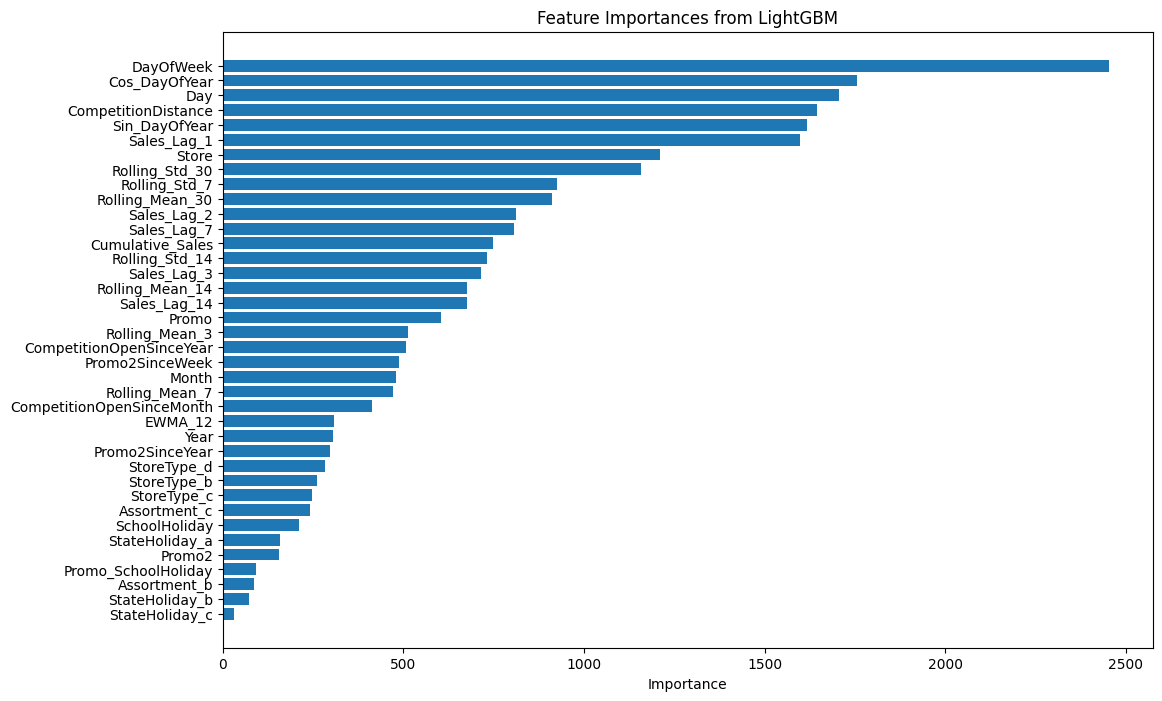

In [42]:
import matplotlib.pyplot as plt

# Get feature importances
importances = final_model.feature_importance()
feature_names = X_train.columns

# Create a DataFrame
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame
feature_imp_df = feature_imp_df.sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
plt.barh(feature_imp_df['Feature'], feature_imp_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importances from LightGBM')
plt.show()
